# Data 620 - Week 4
# Assignment – High Frequency Words

## Group Members : Vijaya Cherukuri, Abdellah Ait Elmouden, Priya Shaji, Habib Khan

## High Frequency Words
### Please answer the following questions in an IPython Notebook, posted to GitHub.

1) Choose a corpus of interest.

2) How many total unique words are in the corpus?  (Please feel free to define unique words in any interesting, defensible way).

3) Taking the most common words, how many unique words represent half of the total words in the corpus?

4) Identify the 200 highest frequency words in this corpus.

5) Create a graph that shows the relative frequency of these 200 words.

6) Does the observed relative frequency of these words follow Zipf’s law? Explain.

7) In what ways do you think the frequency of the words in this corpus differ from “all words in all corpora.”

### Import Required Packages

In [8]:
import nltk
import urllib.request
import pandas as pd
from nltk import word_tokenize
from nltk import PorterStemmer
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import re
import string
import numpy as np
%matplotlib inline

## 1. Choosing a corpus of interest.

We took the dataset available from NLTK corpus https://www.nltk.org/book/ch02.html. Here we choose State "1961-Kennedy.txt" which is available under state_union. 

In [9]:
# Import State_union and download then locally
from nltk.corpus import state_union
nltk.download('state_union')
nltk.download('punkt')

[nltk_data] Downloading package state_union to
[nltk_data]     C:\Users\rajuc\AppData\Roaming\nltk_data...
[nltk_data]   Package state_union is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rajuc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [10]:
# Identify files in the corpus
nltk.corpus.state_union.fileids()

['1945-Truman.txt',
 '1946-Truman.txt',
 '1947-Truman.txt',
 '1948-Truman.txt',
 '1949-Truman.txt',
 '1950-Truman.txt',
 '1951-Truman.txt',
 '1953-Eisenhower.txt',
 '1954-Eisenhower.txt',
 '1955-Eisenhower.txt',
 '1956-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1958-Eisenhower.txt',
 '1959-Eisenhower.txt',
 '1960-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1962-Kennedy.txt',
 '1963-Johnson.txt',
 '1963-Kennedy.txt',
 '1964-Johnson.txt',
 '1965-Johnson-1.txt',
 '1965-Johnson-2.txt',
 '1966-Johnson.txt',
 '1967-Johnson.txt',
 '1968-Johnson.txt',
 '1969-Johnson.txt',
 '1970-Nixon.txt',
 '1971-Nixon.txt',
 '1972-Nixon.txt',
 '1973-Nixon.txt',
 '1974-Nixon.txt',
 '1975-Ford.txt',
 '1976-Ford.txt',
 '1977-Ford.txt',
 '1978-Carter.txt',
 '1979-Carter.txt',
 '1980-Carter.txt',
 '1981-Reagan.txt',
 '1982-Reagan.txt',
 '1983-Reagan.txt',
 '1984-Reagan.txt',
 '1985-Reagan.txt',
 '1986-Reagan.txt',
 '1987-Reagan.txt',
 '1988-Reagan.txt',
 '1989-Bush.txt',
 '1990-Bush.txt',
 '1991-Bush-1.txt',
 '1991-B

Pick '1961-Kennedy.txt' from the corpus

In [11]:
dataset = state_union.raw("1961-Kennedy.txt")

In [12]:
tokens = word_tokenize(dataset)
words = [w for w in tokens if w.isalpha()]
words = [w.lower() for w in words]

In [13]:
len(tokens)

6550

In [14]:
len(words)

5806

## 2. How many total unique words are in the corpus? (Please feel free to define unique words in any interesting, defensible way).

We extracted the total unique words by checking uniques ness within the whole corpora, after removing stop words, and applying the Porter stemmer method that eliminates the variation of words that mean the same.

In [15]:
len(set(words))

1491

In [16]:
round(len(words) / len(set(words)), 2)

3.89

Remove Stop words and see the unique words

In [17]:
nltk.download('stopwords')
stop_words = set(stopwords.words("english") + list(string.punctuation))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rajuc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
words1 = [w for w in words if w not in stop_words]

In [19]:
len(words1)

2881

In [20]:
len(set(words1))

1385

Use Porter Stemmer and see if we can reduce the unique words

In [21]:
ps = PorterStemmer()
words2 = [ps.stem(w) for w in words1]
words2 = set(words2)

In [22]:
len(set(words2))

1122

Unique words came down from 1385 to 1122 by using PorterStemmer method

## 3. Taking the most common words, how many unique words represent half of the total words in the corpus?

Frequency distribution of the unique words in the corpus

In [23]:
freq_distribution = nltk.FreqDist(words1)
freq_distribution
all_words = freq_distribution.most_common()

In [24]:
aw = 0
half_words = []
for w in all_words:
    if aw >= len(words1)/2:
        break
    else:
        aw = aw + w[1]
        half_words.append(w)

len(half_words)

258

There are 258 words that make up 50% of the words in the text.

In [25]:
hw = pd.DataFrame(half_words, columns = ['Words','Count'])
hw.head()

,Words,Count
0,new,31
1,congress,24
2,freedom,22
3,must,21
4,defense,20


## 4. Identify the 200 highest frequency words in this corpus.

In [26]:
top200 = freq_distribution.most_common(200)
top_200 = pd.DataFrame(top200, columns = ['Word', 'Count'])
top_200

,Word,Count
0,new,31
1,congress,24
2,freedom,22
3,must,21
4,defense,20
...,...,...
195,risk,3
196,ask,3
197,measures,3
198,home,3


## 5. Create a graph that shows the relative frequency of these 200 words

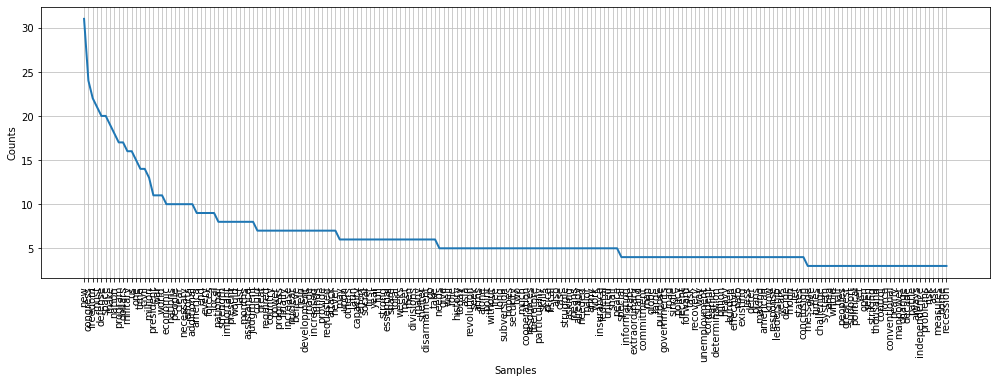

In [27]:
plt.figure(figsize=(17, 5))
freq_distribution.plot(200,)

In [28]:
zipf_data = top_words = freq_distribution.most_common(500)
x = [w+1 for w in range(len(zipf_data))]
y = [freq for (word,freq) in zipf_data]

## 6. Does the observed relative frequency of these words follow Zipf’s law? Explain.

Zipf's law simply states that the occurrence of the most frequent word will be approximately twice as often as the second most frequent word, three times as the third most frequent word, four times as the fourth most frequent word, and so forth in the corpus of natural language utterances.

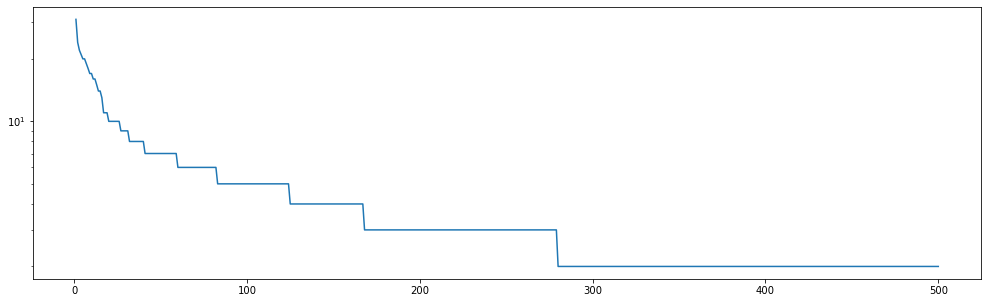

In [29]:
plt.figure(1, figsize=(17,5))
plt.semilogy(x, y)
plt.show()

The relative frequency of these words does follow Zipf's law because, if we look at the plot above, their frequency is not proportional to their ranking. There is also a drop in the frequency after the first few words.

## 7. In what ways do you think the frequency of the words in this corpus differ from “all words in all corpora.

After this excersice, we conclude that the worlds in this corpora doesnot differ with the words in other corpara. The use of words are evenly balanced atleast for the top words. Also here the zipf's law does not fit here as frequency is not proportional to their ranking.